# MMAI 894 - Exercise 1
## Feedforward artificial neural network : Image classification
The goal of this excercise is to show you how to create your first neural network using the tensorflow/keras library. We will be using the MNIST dataset.

Submission instructions:
- You cannot edit this notebook directly. Save a copy to your drive, and make sure to identify yourself in the title using name and student number
- Do not insert new cells before the final one (titled "Further exploration") 
- Select File -> Download as .py (important! not as ipynb)
- Rename the file: `studentID_lastname_firstname_ex1.py`
- Notebook must be able to _restart and run all_
- The mark will be assessed on the implementation of the functions with #TODO
- **Do not change anything outside the functions**  unless in the further exploration section
- The mark is not based on final accuracy - only on correctness

- Do not use any additional libraries than the ones listed below (you may import additional modules from those libraries if needed)

References
- https://keras.io/getting-started/sequential-model-guide/
- https://keras.io/api/utils/python_utils/#to_categorical-function
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://keras.io/api/layers/core_layers/dense/
- https://keras.io/api/layers/regularization_layers/dropout/
- https://keras.io/api/models/model_training_apis/


### Libraries

In [ ]:
# Import modules
# Add modules as needed
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# For windows laptops add following 2 lines:
# import matplotlib
# matplotlib.use('agg')

import matplotlib.pyplot as plt

import tensorflow.keras as keras
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Data preparation

#### Import data

In [ ]:
def load_data():
    # Import MNIST dataset from openml
    dataset = fetch_openml('mnist_784', version=1, data_home=None)

    # Data preparation
    raw_X = dataset['data']
    raw_Y = dataset['target']
    return raw_X, raw_Y

raw_X, raw_Y = load_data()


## Consider the following
- what shape is X?

- what value ranges does X take?
  
 - might this present a problem? 
 
  - what transformations need to be applied?




- what shape is Y?
- what value ranges does Y take? 
 - what transformations should be applied?

In [ ]:
print('Q: what shape is X?')
print('Shape of X:', raw_X.shape)
print('\n')
print('Q: what value ranges does X take?')
print('Range of X is from %s to %s' % (raw_X.min(), raw_X.max()))
print('\n')
print('   Q: might this present a problem?')
print('   we neeed to transform the data from 0 to 1 range.')
print('\n')
print('   Q: what transformations need to be applied?')
print('   divide it by 255')

print('\n')
print('Q: what shape is Y?')
print('Shape of Y:', raw_Y.shape)
print('\n')
print('Q: what value ranges does Y take?')
print('Range of X is from %s to %s' % (raw_Y.min(), raw_Y.max()))
print('\n')
print('   Q: what transformations should be applied?')
print('   Convert it to categorical data')




Q: what shape is X?
Shape of X: (70000, 784)


Q: what value ranges does X take?
Range of X is from 0.0 to 255.0


   Q: might this present a problem?
   we neeed to transform the data from 0 to 1 range.


   Q: what transformations need to be applied?
   divide it by 255


Q: what shape is Y?
Shape of Y: (70000,)


Q: what value ranges does Y take?
Range of X is from 0 to 9


   Q: what transformations should be applied?
   Convert it to categorical data


In [ ]:
def clean_data(raw_X, raw_Y):
    # TODO: clean and QA raw_X and raw_Y
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    print('Shape of X:', raw_X.shape)
    print('Range of X is from %s to %s' % (raw_X.min(), raw_X.max()))
    print('X labels:', raw_X)
    
    cleaned_X = raw_X.astype('float32') / 255   

    
    print('\nShape of Y:', raw_Y.shape)
    print('Range of X is from %s to %s' % (raw_Y.min(), raw_Y.max()))
    print('X labels:', raw_Y)

    # Categorically encode labels
    cleaned_Y = to_categorical(raw_Y, 10)
    
    return cleaned_X, cleaned_Y

cleaned_X, cleaned_Y = clean_data(raw_X, raw_Y)
print('\n')
print('Clean Data:')
print('-----------')
clean_data(cleaned_X, cleaned_Y)

Shape of X: (70000, 784)
Range of X is from 0.0 to 255.0
X labels: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Shape of Y: (70000,)
Range of X is from 0 to 9
X labels: ['5' '0' '4' ... '4' '5' '6']


Clean Data:
-----------
Shape of X: (70000, 784)
Range of X is from 0.0 to 1.0
X labels: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Shape of Y: (70000, 10)
Range of X is from 0.0 to 1.0
X labels: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[[1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],
 
        [[1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
        

#### Data split

- Split your data into a train set (50%), validation set (20%) and a test set (30%). You can use scikit-learn's train_test_split function.

In [ ]:
def split_data(cleaned_X, cleaned_Y):
    # TODO: split the data
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    train_ratio = 0.50
    validation_ratio = 0.20
    test_ratio = 0.30

    X_test, X_train, Y_test, Y_train = train_test_split(cleaned_X, cleaned_Y, test_size = 1-train_ratio, random_state=42)
    
    X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, train_size = validation_ratio/(test_ratio + validation_ratio), random_state = 42)


    return X_val, X_test, X_train, Y_val, Y_test, Y_train



X_val, X_test, X_train, Y_val, Y_test, Y_train = split_data(cleaned_X, cleaned_Y)


In [ ]:
print('X_train:',X_train.shape)
print('X_val:',X_val.shape)
print('X_test:',X_test.shape)


X_train: (35000, 784)
X_val: (14000, 784)
X_test: (21000, 784)


#### [Optional]: plot your data with matplotlib
- Hint: you will need to reshape the row's data into a 28x28 matrix
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

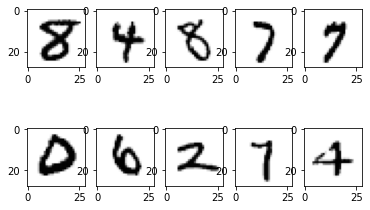

In [ ]:
def viz_data(X_train):
    X_train_sample = X_train[:10, ]
    # TODO: (optional) plot your data with matplotlib
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    for i in range(10):
      img = X_train_sample[i].reshape((28,28))
      plt.subplot(2,5,i+1)
      plt.imshow(img, cmap="Greys")
      #plt.show()
      
   
viz_data(X_train)

### Model

#### Neural network structure
- For this network, we'll use 2 hidden layers
- Layer 1 should have 128 nodes, a dropout rate of 20%, and relu as its activation function
- Layer 2 should have 64 nodes, a dropout rate of 20%, and relu as its activation function
- The last layer should map back to the 10 possible MNIST class. Use softmax as the activation



In [ ]:
def build_model():
    # TODO: build the model, 
    # HINT: you should have Total params: 109,386
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    model = Sequential()
      

    #Adding the input layer and the first hidden layer
    model.add(keras.layers.Flatten(input_shape=[28*28]))
    model.add(Dense(units=128, activation='relu'))
    #dropout rate of 20%
    model.add(Dropout(.2))

    #Layer 2 
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(.20))

    # Adding the output layer
    model.add(Dense(units=10, activation='softmax', ))
     
    return model

model = build_model()

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
__________________________________________________

# Model compilation

- what loss function should you use?
- Note your choice of optimizer
- Include accuracy as a metric

# Model training
- Use a batch size of 128, and train for 12 epochs
- Use verbose training, include validation data


In [ ]:
def compile_model(model):
    # TODO: compile the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])       
    return model

def train_model(model, X_train, Y_train, X_val, Y_val):
    # TODO: train the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION       
    history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size= 128, epochs = 12, verbose=1)
    return model, history

model = compile_model(model)
model, history = train_model(model, X_train, Y_train, X_val, Y_val)

Epoch 1/12
274/274 [==============================] - 2s 5ms/step - loss: 0.9531 - accuracy: 0.7049 - val_loss: 0.2358 - val_accuracy: 0.9279
Epoch 2/12
274/274 [==============================] - 1s 4ms/step - loss: 0.2774 - accuracy: 0.9187 - val_loss: 0.1623 - val_accuracy: 0.9506
Epoch 3/12
274/274 [==============================] - 1s 4ms/step - loss: 0.1997 - accuracy: 0.9403 - val_loss: 0.1402 - val_accuracy: 0.9577
Epoch 4/12
274/274 [==============================] - 1s 4ms/step - loss: 0.1676 - accuracy: 0.9504 - val_loss: 0.1211 - val_accuracy: 0.9635
Epoch 5/12
274/274 [==============================] - 1s 4ms/step - loss: 0.1448 - accuracy: 0.9563 - val_loss: 0.1107 - val_accuracy: 0.9661
Epoch 6/12
274/274 [==============================] - 1s 4ms/step - loss: 0.1188 - accuracy: 0.9641 - val_loss: 0.1032 - val_accuracy: 0.9693
Epoch 7/12
274/274 [==============================] - 1s 4ms/step - loss: 0.0997 - accuracy: 0.9692 - val_loss: 0.0973 - val_accuracy: 0.9694
Epoch 

# Model evaluation
- Show the performance on the test set
- What is the difference between "evaluate" and "predict"?
- Identify a few images the model classifies incorrectly. Any observations?

Model performance on the test set:
Test cross-entropy loss: 0.09535
Test accuracy: 0.97

evaluate() function evaluate the trainig model with the test set, it computes the loss based on the input passed and other evaluation metric like Accuracy
whereas predict() function genrates output prediction of the model 

Predictions are output probability distributions:
First prediction:
 [2.3445311e-07 6.4776609e-06 1.9541719e-06 3.4884238e-07 8.4975655e-12
 9.9996185e-01 2.4509511e-05 2.1627974e-11 4.5998631e-06 6.6054263e-08]




/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



A few incorrectly classified images:


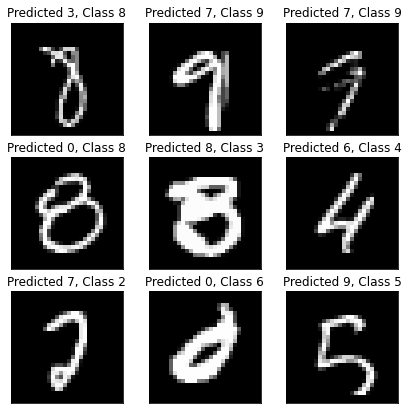

In [ ]:
def eval_model(model, X_test, Y_test):
    # TODO: evaluate the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    score = model.evaluate(X_test, Y_test, verbose=0)
    test_loss = score[0]
    test_accuracy = score[1]
    print('Model performance on the test set:')
    print('Test cross-entropy loss: %0.5f' % score[0])
    print('Test accuracy: %0.2f' % score[1])

    return test_loss, test_accuracy

test_loss, test_accuracy = eval_model(model, X_test, Y_test)

print('\nevaluate() function evaluate the trainig model with the test set, it computes the loss based on the input passed and other evaluation metric like Accuracy' )
print('whereas predict() function genrates output prediction of the model ')
predictions = model.predict([X_test])
print('\nPredictions are output probability distributions:')
print('First prediction:\n', predictions[0])
print('\n')

import numpy as np

predicted_classes = model.predict_classes(X_test)
correct_indices   = np.nonzero(predicted_classes == Y_test.argmax(axis=-1))[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test.argmax(axis=-1))[0]
print('\nA few incorrectly classified images:')    
plt.figure(2, figsize=(7,7))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])


## Further exploration (Not evaluated)
Looking for something else  to do?
- Transform your code to do hyperparameter search. 
- You can vary the number of nodes in the layers, the drop out rate, the optimizer and the parameters in Adam, the batch size, etc.


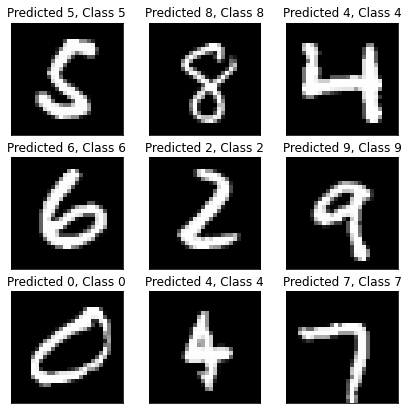

In [ ]:
#Correct predicted
plt.figure(1, figsize=(7,7))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])

### Plot loss trajectory throughout training.



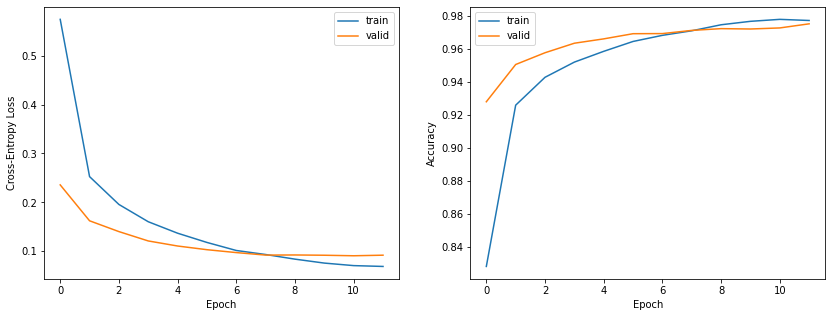

In [ ]:
# Plot loss trajectory throughout training.
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

###Increased the number of layers

In [ ]:
def build_model1():
    # TODO: build the model, 
    # HINT: you should have Total params: 109,386
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    model_1 = Sequential()
    IMGSIZE = 784
    

    #Adding the input layer and the first hidden layer
    model_1.add(Dense(units=128, activation='relu', input_shape=(IMGSIZE, )))
    #dropout rate of 10%
    model_1.add(Dropout(.1))

    #Layer 2 
    model_1.add(Dense(units=64, activation='relu', input_shape=(IMGSIZE, )))
    model_1.add(Dropout(.10))
    #Layer 3
    model_1.add(Dense(units=34, activation='relu', input_shape=(IMGSIZE, )))
    
    #Layer 4
    model_1.add(Dense(units=34, activation='relu', input_shape=(IMGSIZE, )))
    # Adding the output layer
    model_1.add(Dense(units=10, activation='softmax', input_shape=(IMGSIZE, )))
     
    return model_1

model_1 = build_model1()

model_1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 34)                2210      
_________________________________________________________________
dense_6 (Dense)              (None, 34)                1190      
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [ ]:
def compile_model1(model_1):
    # TODO: compile the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    model_1.compile(optimizer = "sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])       
    return model_1

def train_model1(model_1, X_train, Y_train, X_val, Y_val):
    # TODO: train the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION       
    history_1 = model_1.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size= 128, epochs = 12, verbose=1)
    return model_1, history_1

model_1 = compile_model(model_1)
model_1, history_1 = train_model(model, X_train, Y_train, X_val, Y_val)

Epoch 1/12
274/274 [==============================] - 1s 4ms/step - loss: 0.0587 - accuracy: 0.9819 - val_loss: 0.0878 - val_accuracy: 0.9756
Epoch 2/12
274/274 [==============================] - 1s 4ms/step - loss: 0.0555 - accuracy: 0.9817 - val_loss: 0.0862 - val_accuracy: 0.9759
Epoch 3/12
274/274 [==============================] - 1s 4ms/step - loss: 0.0522 - accuracy: 0.9831 - val_loss: 0.0930 - val_accuracy: 0.9751
Epoch 4/12
274/274 [==============================] - 1s 4ms/step - loss: 0.0519 - accuracy: 0.9825 - val_loss: 0.0883 - val_accuracy: 0.9753
Epoch 5/12
274/274 [==============================] - 1s 4ms/step - loss: 0.0456 - accuracy: 0.9849 - val_loss: 0.0890 - val_accuracy: 0.9756
Epoch 6/12
274/274 [==============================] - 1s 4ms/step - loss: 0.0455 - accuracy: 0.9854 - val_loss: 0.0893 - val_accuracy: 0.9754
Epoch 7/12
274/274 [==============================] - 1s 4ms/step - loss: 0.0423 - accuracy: 0.9858 - val_loss: 0.0898 - val_accuracy: 0.9765
Epoch 

In [ ]:
## Perform Hyperparameter Optimization
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid, softmax


def create_model(layers, activation):
  model = Sequential()
  for i, nodes in enumerate(layers):
    if i == 0:
      model.add(Dense(nodes, input_dim = X_train.shape[1]))
      model.add(Activation(activation))
      model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes))
      model.add(Activation(activation))
      model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

layers = [[120], [80,60], [45,30,15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size=[128, 256], epochs=[30])
grid = GridSearchCV(estimator = model, param_grid=param_grid, cv=5)
#grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

grid_result = grid.fit(X_train, Y_train)
print(grid_result.best_score_,grid_result.best_params_)


RuntimeError: ignored